# 13_2.Regression(설명)(연습문제)
- https://www.statsmodels.org/stable/gettingstarted.html

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install pingouin

#  *** 런타임 다시 시작

In [1]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [2]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [4]:
mr_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/07_3.Education.csv', encoding="cp949")
mr_df.head()

,학과,학년,교양만족도,전공만족도,비교과만족도,전체만족도
0,1,1,47.6,40.5,40.0,46.7
1,1,1,33.3,35.7,33.3,33.6
2,1,1,50.0,52.4,50.0,50.4
3,1,1,35.7,28.5,40.0,36.1
4,1,1,54.7,92.8,43.3,56.2


### 2.2 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

### 2.3 자료구조 살펴보기

In [5]:
mr_df.shape

(286, 6)

In [6]:
mr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학과      286 non-null    int64  
 1   학년      286 non-null    int64  
 2   교양만족도   286 non-null    float64
 3   전공만족도   286 non-null    float64
 4   비교과만족도  286 non-null    float64
 5   전체만족도   286 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 13.5 KB


In [7]:
mr_df.columns

Index(['학과', '학년', '교양만족도', '전공만족도', '비교과만족도', '전체만족도'], dtype='object')

## 3.기술통계

In [8]:
# 그룹별 기술통계
mr_df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
학과,286.0,2.846,1.018,1.0,2.000,3.0,4.000,4.0
학년,286.0,2.563,1.050,1.0,2.000,2.0,3.750,4.0
교양만족도,286.0,50.213,16.873,14.4,40.400,50.0,58.900,85.7
전공만족도,286.0,56.285,19.797,21.4,45.500,50.0,68.725,100.0
비교과만족도,286.0,47.290,16.846,20.0,35.000,50.0,56.600,83.3
전체만족도,286.0,51.165,15.079,20.4,41.725,49.7,60.000,85.1


## 4.Regression(설명)
- https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html
- 수치형 + 범주형
- dmatrix 사용


### 4.1 Regression

In [9]:
# 코드 이용
columns = ['교양만족도', '전공만족도', '비교과만족도']

formula = "전체만족도 ~ " + " + ".join(columns)
formula

'전체만족도 ~ 교양만족도 + 전공만족도 + 비교과만족도'

In [10]:
# dmatrix 이용
from patsy import dmatrices

y, X = dmatrices(formula,
                 data = mr_df,
                 return_type = 'dataframe')

In [11]:
X.head()

,Intercept,교양만족도,전공만족도,비교과만족도
0,1.0,47.6,40.5,40.0
1,1.0,33.3,35.7,33.3
2,1.0,50.0,52.4,50.0
3,1.0,35.7,28.5,40.0
4,1.0,54.7,92.8,43.3


In [12]:
model = sm.OLS(y, X)   # 모델 생성
result = model.fit()   # 모델 실행

In [13]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  전체만족도   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 09 Mar 2024   Prob (F-statistic):          1.60e-122
Time:                        09:45:46   Log-Likelihood:                -894.34
No. Observations:                 286   AIC:                             1797.
Df Residuals:                     282   BIC:                             1811.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9143      1.139      4.316      0.0

### 4.2 표준화 계수

In [14]:
# 수치형 자료만 있을때
# model_std = sm.OLS(zscore(y), zscore(X))   # 모델 생성
# result_std = model_std.fit()   # 모델 실행
# print(result_std.summary())

In [15]:
X.columns

Index(['Intercept', '교양만족도', '전공만족도', '비교과만족도'], dtype='object')

In [18]:
from scipy.stats.mstats import zscore

X_std = X[['교양만족도', '전공만족도', '비교과만족도']]
X_std = zscore(X_std)
X_std

,교양만족도,전공만족도,비교과만족도
0,-0.155113,-0.798737,-0.433505
1,-1.004121,-1.041617,-0.831934
2,-0.012622,-0.196597,0.161164
3,-0.861630,-1.405937,-0.433505
4,0.266423,1.847643,-0.237265
...,...,...,...
281,1.400414,1.366943,0.357404
282,1.536968,1.245503,1.945171
283,0.129869,-0.318037,-0.635693
284,1.115432,1.245503,1.546742


In [20]:
y_std = mr_df[["전체만족도"]]
y_std = zscore(y_std)
y_std

,전체만족도
0,-0.296625
1,-1.166894
2,-0.050823
3,-1.000812
4,0.334487
...,...
281,-0.236835
282,1.590067
283,0.161762
284,1.437271


In [21]:
model_std = sm.OLS(y_std, X_std)   # 모델 생성
result_std = model_std.fit()   # 모델 실행
print(result_std.summary())

                                 OLS Regression Results                                
Dep. Variable:                  전체만족도   R-squared (uncentered):                   0.866
Model:                            OLS   Adj. R-squared (uncentered):              0.864
Method:                 Least Squares   F-statistic:                              607.5
Date:                Sat, 09 Mar 2024   Prob (F-statistic):                   5.87e-123
Time:                        09:47:06   Log-Likelihood:                         -118.83
No. Observations:                 286   AIC:                                      243.7
Df Residuals:                     283   BIC:                                      254.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [22]:
print("===== 비표준화 계수 =====")
print(result.params)
print("\n")
print("===== 표준화 계수 =====")
print(result_std.params)


===== 비표준화 계수 =====
Intercept    4.914338
교양만족도        0.247602
전공만족도        0.360227
비교과만족도       0.286372
dtype: float64


===== 표준화 계수 =====
교양만족도     0.277051
전공만족도     0.472942
비교과만족도    0.319917
dtype: float64


## 5.가정검정
- https://ethanweed.github.io/pythonbook/05.04-regression.html#regressionnormality
- 잔차의 등분산성: Breusch-Pagan
- 잔차의 정규성: Jarque-Bera, Omnibus(D'Angostino's test)
- 독립성(자기상관): Durbin-Watson
- 다중공선성(VIF): Cond. No

### 5.1 기본 검정
- 잔차의 정규성: Jarque-Bera, Omnibus(D'Angostino's test)
- 독립성(자기상관): Durbin-Watson
- 다중공선성(VIF): Cond. No

In [23]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  전체만족도   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 09 Mar 2024   Prob (F-statistic):          1.60e-122
Time:                        09:47:17   Log-Likelihood:                -894.34
No. Observations:                 286   AIC:                             1797.
Df Residuals:                     282   BIC:                             1811.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9143      1.139      4.316      0.0

### 5.2 잔차의 등분산 검정
- 잔차의 등분산성 테스트: Breush-Pagan 테스트:


In [24]:
# 잔차의 등분산성 테스트: Breush-Pagan 테스트:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(result.resid, result.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 11.133149506709817),
 ('p-value', 0.011027248981137978),
 ('f-value', 3.8073563681927887),
 ('f p-value', 0.010610627224021894)]

In [25]:
# 잔차 플롯

# 표준화 잔차 생성
influence = result.get_influence()
res_standard = influence.resid_studentized_internal

# 예측값 생성
pred = result.predict(X)

# 데이터 프레임으로 생성
regplot_df = pd.DataFrame({'pred': pred, 'res_standard': res_standard})
regplot_df

,pred,res_standard
0,42.744247,0.714350
1,35.555762,-0.353308
2,50.488911,-0.016030
3,35.475064,0.113067
4,64.287115,-1.474140
...,...,...
281,68.457871,-3.779109
282,75.808941,-0.128673
283,46.381226,1.303748
284,72.132277,0.120923


<Axes: >

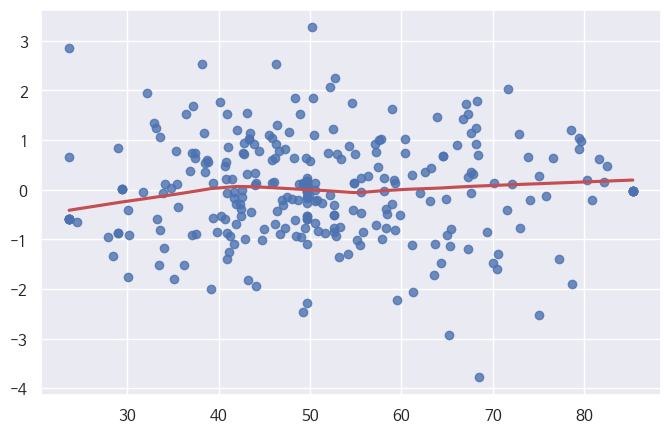

In [26]:
## 잔차 plot
plt.rc("figure", figsize=(8, 5))
sns.regplot(x = pred,
            y = res_standard,
            lowess = True,
            line_kws=dict(color="r"),
            data = regplot_df)

### 5.3 잔차의 정규성 검정

In [27]:
# shapiro test
pg.normality(result.resid)

,W,pval,normal
0,0.992826,0.185589,True


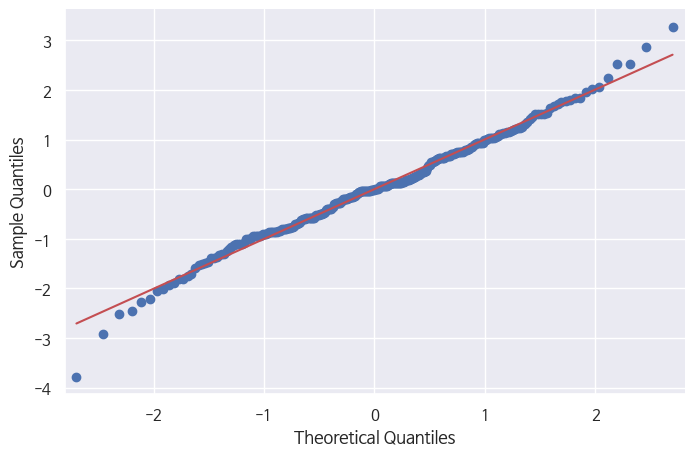

In [28]:
## QQ plot
plt.rc("figure", figsize=(8, 5))
sm.qqplot(res_standard, line = 's')
sns.despine()

### 5.4 이상치 제거

In [29]:
# 표준화 잔차를 이용한 이상치 확인
stud_res = result.outlier_test()
stud_res.sort_values(by = "student_resid", ascending = False).head(5)

,student_resid,unadj_p,bonf(p)
120,3.329208,0.000987,0.282349
48,2.895698,0.004080,1.000000
32,2.554869,0.011150,1.000000
69,2.554638,0.011157,1.000000
115,2.258456,0.024684,1.000000


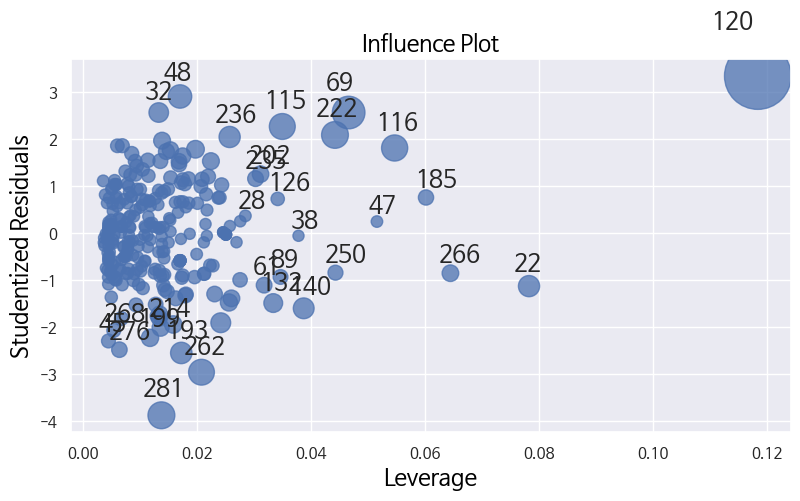

In [30]:
## cooks_distance를 이용한 이상치 확인
## https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

fig = sm.graphics.influence_plot(result, criterion="cooks")
plt.rc("figure", figsize=(8, 5))
plt.rc("font", size = 7)
fig.tight_layout(pad = 1.0)

In [31]:
# cooks_distance를 이용한 이상치 확인
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(result).cooks_distance
pd.DataFrame(test_class).T.sort_values(by = 0, ascending = False).head(10)

,0,1
120,0.359243,0.837495
69,0.078200,0.988910
281,0.049730,0.995341
222,0.049392,0.995402
116,0.046578,0.995896
115,0.045518,0.996075
262,0.045139,0.996138
48,0.035337,0.997602
193,0.027913,0.998489
22,0.027069,0.998577


In [32]:
# 이상치 제거
mr_df = mr_df.drop(120)

### 5.5 선형성

<Axes: xlabel='pred', ylabel='전체만족도'>

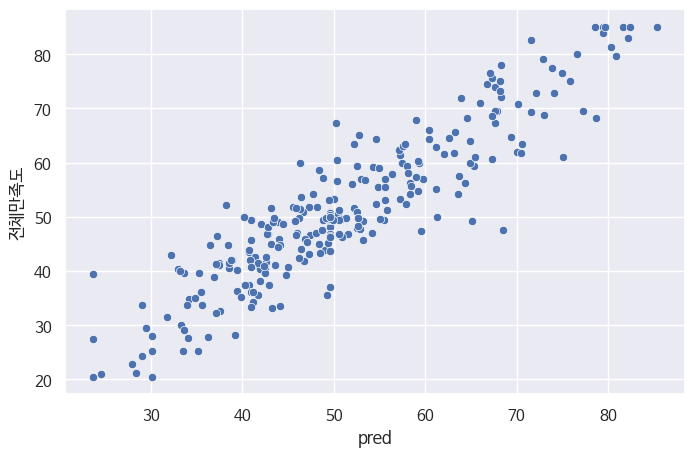

In [34]:
# 회귀도표: 예측치 vs 실제값
sns.scatterplot(x = regplot_df["pred"], y = mr_df["전체만족도"])

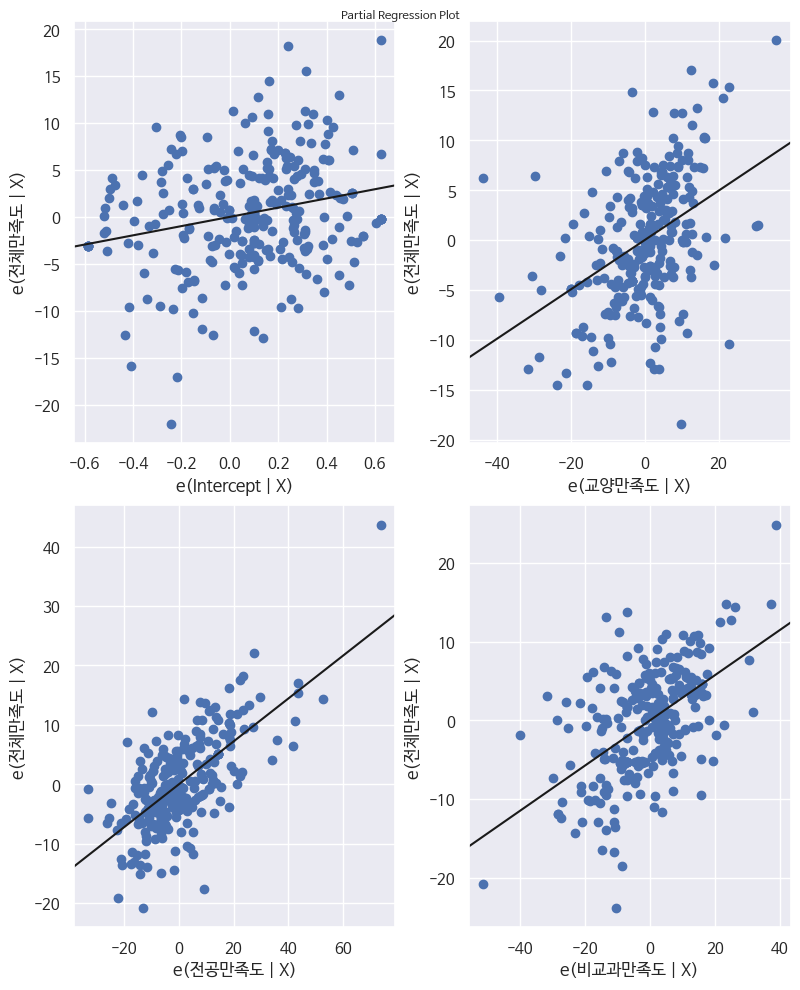

In [36]:
# 부분 회귀 도표
plt.rc("figure", figsize=(8, 10))
fig = sm.graphics.plot_partregress_grid(result)
fig.tight_layout(pad = 1.0)

### 5.6 다중 공선성
- VIF 10이상 삭제

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.values.shape[1])]
vif["features"] = X.columns
print(vif.round(1))

   VIF Factor   features
0        12.0  Intercept
1         2.5      교양만족도
2         2.0      전공만족도
3         1.8     비교과만족도
